GRIP : THE SPARKS FOUNDATION

DATA SCIENCE AND BUSINESS ANALYTICS INTERN 

TASK1 : PREDICTION USING SUPERVISED LEARNING ML

AUTHOR : SNEHA WANDHARE

OBJECTIVE : 

    ● Predict the percentage of an student based on the no. of study hours.
    ● What will be predicted score if a student studies for 9.25 hrs/ day?
 


In [25]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
from sklearn.metrics import r2_score

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize']=[15,8]

## Reading the data 

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
#Display first 5 observation
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Understanding the size of the data

In [4]:
data.shape

(25, 2)

*The given data has 25 rows and 2 columns*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are no null obdervations in the data.

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualsizing the data for better understanding

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

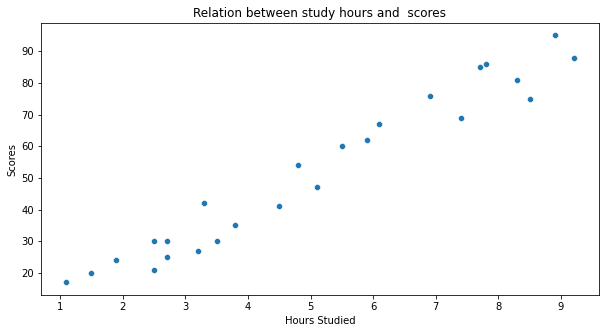

In [7]:

plt.figure(figsize=(10,5))

sns.scatterplot(x = 'Hours', y='Scores',data = data)
plt.title('Relation between study hours and  scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores') 

plt.show()

From the above plot,we observe that there is high positive correlation between the no. of hours studied to percentage scored.

<AxesSubplot:xlabel='Hours', ylabel='Density'>

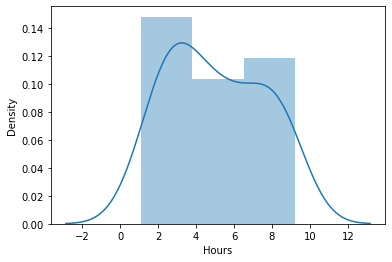

In [26]:
sns.distplot(data['Hours'])

<AxesSubplot:xlabel='Scores', ylabel='Density'>

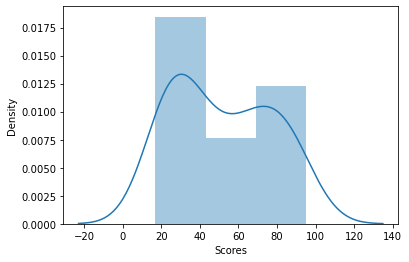

In [27]:
sns.distplot(data['Scores'])

Both the features are nearly normal

## Preparing the data for Regression

In [8]:
X = data.iloc[:, :-1] 
y = data.iloc[:, 1]

Now that we have our attributes and labels, the next step is to split this data into training and test sets.
We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [9]:
#Splitting the data into 70-30 percent with 70 percent train, and 30 percent data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=50) 



Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [10]:
Lin_reg = LinearRegression()  

Lin_reg.fit(X_train, y_train) 

LinearRegression()

Regression plot

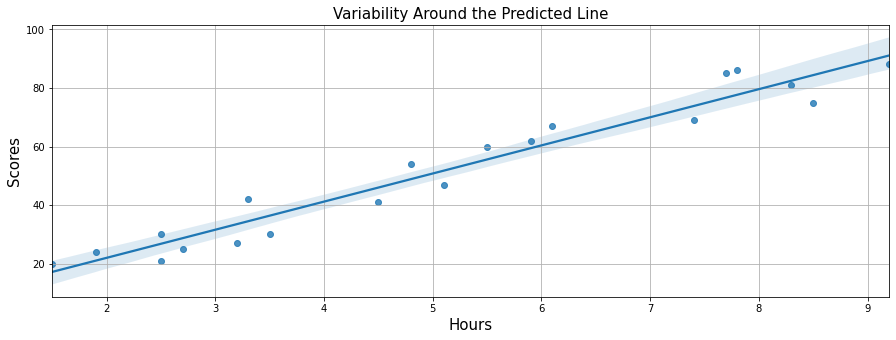

In [11]:
plt.figure(figsize = (15,5))
sns.regplot(x = X_train, y = y_train)
plt.title('Variability Around the Predicted Line', fontsize = 15)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.grid()
# display the plot
plt.show()

## Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
print(X_test) # Testing data - In Hours
y_pred = Lin_reg.predict(X_test) # Predicting the scores

    Hours
15    8.9
20    2.7
23    6.9
22    3.8
14    1.1


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
15,95,88.211394
20,30,28.718453
23,76,69.020122
22,35,39.273652
14,17,13.365436


In [14]:
# You can also test with your own data
hours = float(input("Enter the number of hours"))
own_pred = Lin_reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the number of hours 9.25


No of Hours = 9.25
Predicted Score = 91.56986604454477


## Evaluating the model

    The final step is to evaluate the performance of algorithm. 
    This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [15]:
 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 Score:', 
      metrics.r2_score(y_test, y_pred)) 

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
